### RLE estimation of OPERA CSLC products in AWS S3 bucket using PyCuAmpcor

In [1]:
import numpy as np
import os

from PyCuAmpcor import PyCuAmpcor

In [2]:
burst_id = 't064_135523_iw2'
s3path = 's3://opera-provisional-products/CSLC/pst_adt_common/gamma_v.0.3/Rosamond/Ascending' 

#acquisition dates of P64 (t064_135523_iw2) in 2021 (Rosamond,CA)
datelist = [20210106,20210112,20210124,20210130,20210205,20210211,20210217,20210223,20210301,
            20210307,20210313,20210319,20210325,20210331,20210406,20210412,20210418,20210424,
            20210430,20210506,20210512,20210518,20210524,20210530,20210605,20210611,20210617,
            20210623,20210629,20210705,20210711,20210717,20210723,20210729,20210804,20210810,
            20210822,20210828,20210903,20210909,20210915,20210921,20210927,20211003,20211009,
            20211015,20211021,20211027,20211102,20211108,20211114,20211120,20211126,20211202,
            20211208,20211214,20211220]

In [3]:
txtfile = f'{burst_id}_proc_2021.txt'   #text file of a single column of dates
with open(txtfile, 'w') as f:
    for line in datelist:
        f.write(f"{line}\n")

In [4]:
#usage of offset tracking with streamed OPERA CSLCs
!../batch_scripts/run_batch_offset_stream.py -h

usage: run_batch_offset_stream.py [-h] --s3path S3PATH --burstID BID
                                  --datefile DFILE [--slc_dir SLC_DIR]
                                  [--out_dir OUT_DIR] [--minTemp MINTEMP]
                                  [--maxTemp MAXTEMP] [--ww WW] [--wh WH]
                                  [--nwdc NWDC] [--nwac NWAC] [--snr SNR]
                                  [--tsmethod TSMETHOD] [--pngfile PNG]
                                  [--csvfile CSV]

Batch processing of offset tracking and Generating a final output

options:
  -h, --help           show this help message and exit
  --s3path S3PATH      aws S3 bucket location (e.g., s3://opera-
                       provisional/...)
  --burstID BID        burst ID to be processed
  --datefile DFILE     text file with 1-column dates (YYYYMMDD) to be
                       processed
  --slc_dir SLC_DIR    slc directory (default: SLCDIR)
  --out_dir OUT_DIR    output directory for offset results (default: outp

In [5]:
#running RLE batch processing
maxTemp = 365 #maximum temporal baseline (days)
ww = 128 #window width 
wh = 128 #window height
snr = 10 #SNR threshold for choosing valid offsets
nwdc = 30 #number of windows processed in a chunk along lines (larger for faster GPU processing)
nwac = 30 #number of windows processed in a chunk along columns
tsmethod = 'mintpy' #inversion method for time-series offsets, mintpy (default), sbas (simple sbas, faster) 
outdir = 'OFFSETS_2021' #output directory for offsets
slcdir = 'SLCDIR_2021'  #output directory for CSLCs
pngfile = f'RLE_ts_{burst_id}_2021.png'  #output image file
csvfile = f'RLE_ts_{burst_id}_2021.csv'  #output csv file 

cmd = f'../batch_scripts/run_batch_offset_stream.py --s3path {s3path} --burstID {burst_id} --datefile {txtfile} --out_dir {outdir} --slc_dir {slcdir} --maxTemp {maxTemp} --ww {ww} --wh {wh} --nwdc {nwdc} --nwac {nwac} --snr {snr} --pngfile {pngfile} --csvfile {csvfile} --tsmethod {tsmethod}'
print(cmd)

run_batch_offset_stream.py --s3path s3://opera-provisional-products/CSLC/pst_adt_common/gamma_v.0.3/Rosamond/Ascending --burstID t064_135523_iw2 --datefile t064_135523_iw2_proc_2021.txt --out_dir OFFSETS_2021 --slc_dir SLCDIR_2021 --maxTemp 365 --ww 128 --wh 128 --nwdc 30 --nwac 30 --snr 10 --pngfile RLE_ts_t064_135523_iw2_2021.png --csvfile RLE_ts_t064_135523_iw2_2021.csv --tsmethod mintpy


In [ ]:
os.system(cmd)

(-0.5, 3674.5, 2557.5, -0.5)

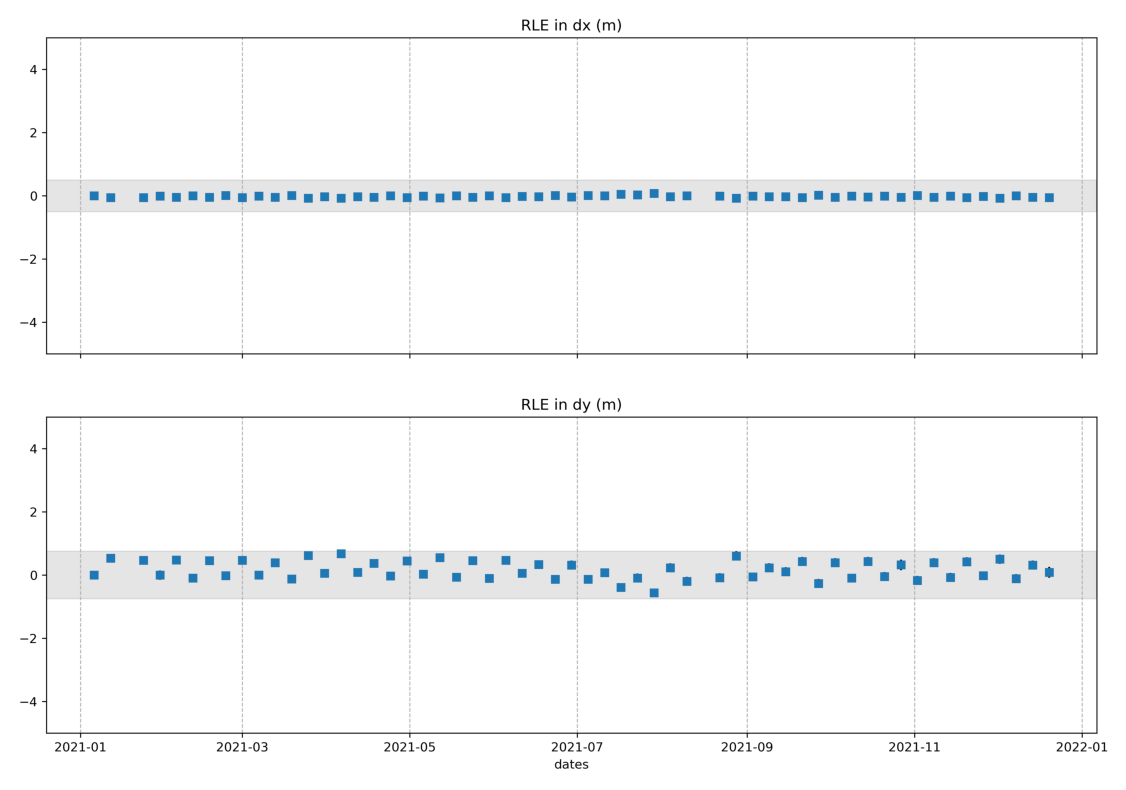

In [7]:
#dispalying time-series offset tracking results
import matplotlib.pyplot as plt
import matplotlib.image as img
im = img.imread(pngfile)

fig, ax = plt.subplots(figsize=(15,10), dpi=100)
ax.imshow(im)
ax.axis('off')